In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy, os, glob, sys, re
import matplotlib.ticker as mtick

In [2]:
def ttest_1samp(dat, popmean = .5, verbose = True):
    if verbose:
        print('SD: ',np.std(dat))
        print('Stats:')
    stats = scipy.stats.ttest_1samp(dat, popmean = popmean)
    if verbose:
        print(stats)
        print('Cohen d:')
    coh_d = (np.mean(dat) - popmean)/np.std(dat)
    if verbose:
        print(coh_d)
    return(stats, coh_d)

def ttest_2samp(dat1, dat2):
    print('SD dat 1: ',np.std(dat1))
    print('SD dat 2: ',np.std(dat2))
    print('Stats:')
    stats = scipy.stats.ttest_ind(dat1, dat2)
    print(stats)
    print('Cohen d:')
    nx = len(dat1)
    ny = len(dat2)
    dof = nx + ny - 2
    coh_d = ((np.mean(dat1) - np.mean(dat2)) /
             np.sqrt(((nx-1)*np.std(dat1, ddof=1) ** 2 + (ny-1)*np.std(dat2, ddof=1) ** 2) / dof))
    print(coh_d)
    return(stats, coh_d)

In [4]:
base_dir = os.path.realpath('../..')
print(base_dir)
sys.path.append('/'.join(os.path.realpath('..').split('/')[:4]) + '/Python')
import FigureTools

/Users/jeroen/Dropbox (Brown)/Postdoc FHL/JEROEN/SOC_STRUCT_LEARN/Code_share/NHB_motives_structure/Study2_EyeTracking


In [5]:
gameDat = pd.read_csv(base_dir + '/Data/gameDat_study2.csv',
                      index_col = 0, dtype={ 'subID':str})
gameDat.head()

,sub,subID,Block,Player,Type,Variant,Type_Total,Trial,S,T,GameType,Colors,CorrAns,GivenAns,ConfidenceNum,ScoreNum,RT_radio,RT_submit,SelfReport
0,5,5005,0,N.N.,opt,nat,opt_nat,0,0,12,PD,"['Not', 'Defined']",def,def,86,1,8631,10443,not defined
1,5,5005,0,N.N.,opt,nat,opt_nat,1,7,5,HG,"['Not', 'Defined']",coop,coop,70,1,3639,5183,not defined
2,5,5005,0,N.N.,opt,nat,opt_nat,2,10,12,SG,"['Not', 'Defined']",def,coop,52,0,4796,6608,not defined
3,5,5005,0,N.N.,opt,nat,opt_nat,3,3,5,SH,"['Not', 'Defined']",coop,def,52,0,3840,5502,not defined
4,5,5005,0,N.N.,opt,nat,opt_nat,4,0,8,SH,"['Not', 'Defined']",coop,coop,54,1,3806,6322,not defined


In [6]:
gameDat['AnsNum'] = gameDat['GivenAns'].apply(lambda x: int(x == 'coop'))
gameDat['phase'] = gameDat['Trial'].apply(lambda x: 'early' if x < 8 else 'late')
gameDat['Trial_total'] = gameDat['Block']*16 + gameDat['Trial']

In [7]:
blockDat = gameDat[['subID','Type_Total','Type','Variant','ConfidenceNum','ScoreNum']
                  ].groupby(['subID','Type_Total','Type','Variant'], as_index=False).mean()
blockDat = blockDat.rename(columns={'ConfidenceNum':'Confidence','ScoreNum':'Score'})
subIDs = blockDat['subID'].unique()
print(len(subIDs))
blockDat.head()

50


,subID,Type_Total,Type,Variant,Confidence,Score
0,5005,opt_inv,opt,inv,46.65625,0.40625
1,5005,opt_nat,opt,nat,82.93750,0.90625
2,5005,pess_inv,pes,_inv,64.40625,0.43750
3,5005,pess_nat,pes,_nat,91.09375,0.93750
4,5006,opt_inv,opt,inv,47.21875,0.40625


# Supplementary Results 6 part 2: compare models for study 2

## Load model fits

In [8]:
def load_model_fits(date_string, features,
                    niter = 10, gaze = False, model_string = 'FeatureRL', fit_to = 'joint'):
    
    print(date_string, features)
    
    model_fits = pd.read_csv(base_dir + 
         '/Data/Model_results/' +
         '%s_%s_%s_fitto-%s_gaze-%s_niter-%i.csv'%(
             model_string,features,date_string, fit_to, gaze, niter),
           index_col = None, dtype={'sub_ID':str, 'comb':str, 'fit_to':str, 'sub_ind':int})
    display(model_fits.head())
    print(model_fits.shape)
    return model_fits

### FeatureRL with motives (groups 1 and 2)

In [9]:
date_string = '2020-03-31'
features = 'CoGrRiNa'
model_fits = load_model_fits(date_string, features)

2020-03-31 CoGrRiNa


,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,inv_temp,gaze_bias,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,cost_type,SSE,LL,BIC
0,151,5005,joint,1,0001,Nash,0,0,0,0.924,...,0.308,0.0,4.404,NaN,NaN,NaN,SSE,12.494,-32.710,79.976
1,151,5005,joint,2,0010,Risk,0,0,0,0.595,...,0.333,0.0,2.309,NaN,NaN,NaN,SSE,13.805,-39.096,92.749
2,151,5005,joint,3,0011,Risk_Nash,0,0,0,0.556,...,0.356,0.0,1.198,3.103,NaN,NaN,SSE,10.972,-24.401,68.210
3,151,5005,joint,4,0100,Greed,0,0,0,1.090,...,0.157,0.0,6.172,NaN,NaN,NaN,SSE,12.907,-34.796,84.148
4,151,5005,joint,5,0101,Greed_Nash,0,0,0,0.735,...,0.243,0.0,2.886,3.836,NaN,NaN,SSE,10.813,-23.465,66.337


(750, 21)


##### Group 1: Extract full model fits (comb 1111)

In [10]:
group_1 = model_fits.query('comb == "1111"').copy().reset_index(drop=True)
group_1['model_descr'] = 'All Motives'
display(group_1.head())
group_1.shape

,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,gaze_bias,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,cost_type,SSE,LL,BIC,model_descr
0,151,5005,joint,15,1111,Coop_Greed_Risk_Nash,0,0,0,0.704,...,0.0,0.766,4.463,3.910,0.898,SSE,7.542,-0.407,29.925,All Motives
1,152,5006,joint,15,1111,Coop_Greed_Risk_Nash,0,0,0,1.420,...,0.0,-2.407,6.403,5.780,5.182,SSE,4.184,37.302,-45.492,All Motives
2,153,5007,joint,15,1111,Coop_Greed_Risk_Nash,0,0,0,1.177,...,0.0,0.174,2.268,0.285,2.401,SSE,7.999,-4.174,37.461,All Motives
3,154,5008,joint,15,1111,Coop_Greed_Risk_Nash,0,0,0,1.352,...,0.0,0.816,2.010,3.251,2.952,SSE,5.468,20.178,-11.243,All Motives
4,155,5009,joint,15,1111,Coop_Greed_Risk_Nash,0,0,0,0.186,...,0.0,-1.704,2.085,2.315,3.837,SSE,4.845,27.919,-26.725,All Motives


(50, 22)

##### Group 2: Tag best model per subject

In [11]:
model_fits['best_model'] = False
for sub_ID in model_fits['sub_ID'].unique():
    sub_dat = model_fits.query('sub_ID == @sub_ID').sort_values(by='BIC',ascending=True).copy()
    best_model = sub_dat.iloc[0]
    best_BIC = best_model['BIC']
    model_fits.loc[(model_fits['sub_ID']==sub_ID) & (model_fits['BIC']==best_BIC),'best_model'] = True

In [12]:
group_2 = model_fits.query('best_model == True').copy().reset_index(drop=True)
group_2['model_descr'] = 'Best Motives'
display(group_2.head())
group_2.shape

,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,cost_type,SSE,LL,BIC,best_model,model_descr
0,151,5005,joint,6,0110,Greed_Risk,0,0,0,0.747,...,3.760,3.179,NaN,NaN,SSE,7.397,0.819,17.769,True,Best Motives
1,152,5006,joint,14,1110,Coop_Greed_Risk,0,0,0,0.114,...,-0.154,0.495,0.473,NaN,SSE,4.209,36.928,-49.597,True,Best Motives
2,153,5007,joint,3,0011,Risk_Nash,0,0,0,1.544,...,-0.032,3.645,NaN,NaN,SSE,7.439,0.472,18.464,True,Best Motives
3,154,5008,joint,7,0111,Greed_Risk_Nash,0,0,0,0.648,...,0.939,1.559,1.528,NaN,SSE,5.546,19.267,-14.274,True,Best Motives
4,155,5009,joint,9,1001,Coop_Nash,0,0,0,0.350,...,-0.807,2.978,NaN,NaN,SSE,4.941,26.660,-33.913,True,Best Motives


(50, 23)

### Game Types + intercept (group 3)

In [13]:
date_string = '2020-03-31'
features = 'CoHgShSgPd'
model_fits = load_model_fits(date_string, features)

2020-03-31 CoHgShSgPd


,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,gaze_bias,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,cost_type,SSE,LL,BIC
0,151,5005,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,2.501,...,0.0,5.665,1.090,-4.372,-5.013,-9.464,SSE,8.198,-5.740,45.444
1,152,5006,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,1.452,...,0.0,0.074,1.923,-1.494,-1.800,-3.866,SSE,4.179,37.381,-40.797
2,153,5007,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,0.528,...,0.0,-2.774,3.135,2.788,2.411,2.311,SSE,10.017,-18.566,71.096
3,154,5008,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,2.484,...,0.0,-2.176,5.166,2.401,3.382,0.227,SSE,6.421,9.891,14.182
4,155,5009,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,0.010,...,0.0,-0.319,19.927,-6.944,-5.926,-19.927,SSE,5.186,23.563,-13.162


(50, 22)


In [14]:
group_3 = model_fits.copy()
group_3['model_descr'] = 'Game Types'
display(group_3.head())
group_3.shape

,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,cost_type,SSE,LL,BIC,model_descr
0,151,5005,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,2.501,...,5.665,1.090,-4.372,-5.013,-9.464,SSE,8.198,-5.740,45.444,Game Types
1,152,5006,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,1.452,...,0.074,1.923,-1.494,-1.800,-3.866,SSE,4.179,37.381,-40.797,Game Types
2,153,5007,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,0.528,...,-2.774,3.135,2.788,2.411,2.311,SSE,10.017,-18.566,71.096,Game Types
3,154,5008,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,2.484,...,-2.176,5.166,2.401,3.382,0.227,SSE,6.421,9.891,14.182,Game Types
4,155,5009,joint,31,11111,Coop_Harmony_StagHunt_Snowdrift_Prisoners,0,0,0,0.010,...,-0.319,19.927,-6.944,-5.926,-19.927,SSE,5.186,23.563,-13.162,Game Types


(50, 23)

### Games + intercept (group 4)

In [15]:
date_string = '2020-03-31'
features = 'CoST'
model_fits = load_model_fits(date_string, features)

2020-03-31 CoST


,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,feature_weight_12,feature_weight_13,feature_weight_14,feature_weight_15,feature_weight_16,feature_weight_17,cost_type,SSE,LL,BIC
0,151,5005,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,-0.295,-2.517,17.771,16.066,6.396,-0.920,SSE,11.138,-25.358,142.905
1,152,5006,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,0.133,-3.857,19.028,12.275,4.316,-2.626,SSE,5.776,16.662,58.865
2,153,5007,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,-13.303,-5.195,9.021,19.968,0.083,-17.249,SSE,13.119,-35.838,163.865
3,154,5008,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,0.349,9.486,19.818,11.339,5.019,4.791,SSE,9.325,-13.991,120.170
4,155,5009,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.011,...,-5.163,-4.307,9.919,11.780,6.756,-0.254,SSE,4.185,37.285,17.618


(50, 34)


In [16]:
group_4 = (model_fits
           .copy().reset_index(drop=True))
group_4['model_descr'] = 'Games'
display(group_4.head())
group_4.shape

,sub_ind,sub_ID,fit_to,comb_index,comb,feature_names,asymm_LR,bounded_weights,gaze,LR_up,...,feature_weight_13,feature_weight_14,feature_weight_15,feature_weight_16,feature_weight_17,cost_type,SSE,LL,BIC,model_descr
0,151,5005,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,-2.517,17.771,16.066,6.396,-0.920,SSE,11.138,-25.358,142.905,Games
1,152,5006,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,-3.857,19.028,12.275,4.316,-2.626,SSE,5.776,16.662,58.865,Games
2,153,5007,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,-5.195,9.021,19.968,0.083,-17.249,SSE,13.119,-35.838,163.865,Games
3,154,5008,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.010,...,9.486,19.818,11.339,5.019,4.791,SSE,9.325,-13.991,120.170,Games
4,155,5009,joint,131071,11111111111111111,Coop_S0T5_S0T8_S0T12_S0T15_S3T5_S3T8_S3T12_S3T...,0,0,0,0.011,...,-4.307,9.919,11.780,6.756,-0.254,SSE,4.185,37.285,17.618,Games


(50, 35)

## Compare

In [17]:
all_model_fits = group_1.append(group_2).append(group_3).append(group_4)

/Users/jeroen/anaconda3/envs/struct_learn/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [18]:
all_model_fits.columns

Index(['BIC', 'LL', 'LR_down', 'LR_up', 'SSE', 'asymm_LR', 'best_model',
       'bounded_weights', 'comb', 'comb_index', 'cost_type', 'feature_names',
       'feature_weight_1', 'feature_weight_10', 'feature_weight_11',
       'feature_weight_12', 'feature_weight_13', 'feature_weight_14',
       'feature_weight_15', 'feature_weight_16', 'feature_weight_17',
       'feature_weight_2', 'feature_weight_3', 'feature_weight_4',
       'feature_weight_5', 'feature_weight_6', 'feature_weight_7',
       'feature_weight_8', 'feature_weight_9', 'fit_to', 'gaze', 'gaze_bias',
       'inv_temp', 'model_descr', 'sub_ID', 'sub_ind'],
      dtype='object')

##### Remove outliers

[-323.30800000000005, 402.7460000000001]


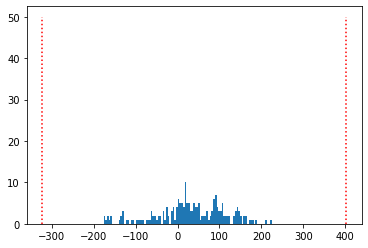

In [19]:
BICs = all_model_fits['BIC'].values
plt.hist(BICs, 100);
iqr = (all_model_fits['BIC'].describe()['75%'] - 
       all_model_fits['BIC'].describe()['25%'])
accepted_range = [all_model_fits['BIC'].describe()['25%'] - 3*iqr,
                  all_model_fits['BIC'].describe()['75%'] + 3*iqr]
min_BIC,max_BIC = accepted_range
print(accepted_range)
plt.plot([min_BIC,min_BIC],[0,50],'r:')
plt.plot([max_BIC,max_BIC],[0,50],'r:')

In [20]:
outlier_subjects = all_model_fits.query(
    '(BIC < @min_BIC | BIC > @max_BIC)')[
    ['sub_ind','sub_ID']].drop_duplicates()
outlier_sub_inds = outlier_subjects['sub_ind'].unique()
outlier_subjects

,sub_ind,sub_ID


In [21]:
all_model_fits_cleaned = all_model_fits.loc[
    ~all_model_fits['sub_ID'].isin(outlier_subjects.sub_ID),:].copy()
all_model_fits_cleaned[['SSE','LL','BIC']].describe()

,SSE,LL,BIC
count,200.00000,200.000000,200.000000
mean,7.81593,7.223805,29.487485
std,4.19254,37.794916,84.484279
min,1.53300,-73.301000,-176.398000
25%,4.93025,-19.153000,-12.142000
50%,7.19600,2.596500,28.506000
75%,10.10775,26.798750,91.580000
max,23.55800,101.566000,225.519000


In [22]:
all_model_fits_cleaned['model_descr'].unique()

array(['All Motives', 'Best Motives', 'Game Types', 'Games'], dtype=object)

##### Plot

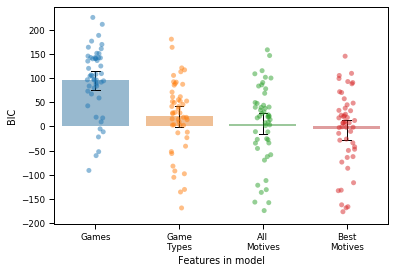

In [23]:
sns.set_context('paper')
fig,ax = plt.subplots(1,1,figsize = [6,4])
bar_order = ['Games', 'Game Types', 'All Motives', 'Best Motives']
# bar_order = ['Games', 'Game Types']
xticklabels = ['\n'.join(a.split(' ')) for a in bar_order]

sns.barplot(data = all_model_fits_cleaned, x = 'model_descr', y = 'BIC', ax = ax, alpha = .5,
            order = bar_order, errcolor = 'k', capsize = .1, errwidth = 1)
sns.stripplot(data = all_model_fits_cleaned, x = 'model_descr', y = 'BIC', ax = ax, alpha = .5,
            order = bar_order)
# FigureTools.add_sig_markers(ax,relationships=[[2,3,0],[1,2,0]], distScale=.5, ystart = 30)
ax.set(ylabel = 'BIC', xlabel = 'Features in model',
      xticklabels = xticklabels);
# plt.savefig('/Users/jeroen/Desktop/modelcomp.pdf',transparent=True, bbox_inches = 'tight')

##### Stats

In [24]:
def compare_models(name1,name2, plot_fig = True):
    testdat = all_model_fits_cleaned.query('model_descr == @name1 or model_descr == @name2')
    if plot_fig:
        fig,ax = plt.subplots(1,2,figsize=[10,3])
        sns.barplot(data = testdat, x = 'model_descr', y = 'BIC', ax = ax[0], order = [name1,name2], alpha = .5)
        sns.swarmplot(data = testdat, x = 'model_descr', y = 'BIC', ax = ax[0], order = [name1,name2], alpha = .5)
    testdat = testdat.pivot(index = 'sub_ID', columns = 'model_descr', values = 'BIC').dropna()
    diffs = testdat[name1] - testdat[name2]
    if plot_fig:
        ax[1].hist(diffs)
        ax[1].set(xlabel = '%s - %s'%(name1,name2))
    if scipy.stats.normaltest(diffs)[1] < 0.05:
        stats = scipy.stats.wilcoxon(testdat[name1], testdat[name2])
        test_type = 'nonparametric'
    else:
        stats = scipy.stats.ttest_rel(testdat[name1], testdat[name2])
        test_type = 'parametric'
#     print('mean dBIC = %.2f, %i wins %i losses %i ties, %s stat = %.4f, p = %.4f'%(
#             np.mean(diffs), sum(diffs<0), sum(diffs>0), sum(diffs==0), test_type, stats[0], stats[1]))
    coh_d = (np.mean(diffs))/np.std(diffs)
    print('mean dBIC = %.2f +- %.2f, %i wins %i losses, %s stat = %.4f, p = %.4f, d = %.2f'%(
            np.mean(diffs), np.std(diffs), sum(diffs<0), sum(diffs>0), test_type, stats[0], stats[1], coh_d))
    return stats, diffs

In [25]:
model_list = bar_order
for name1 in model_list:
    for name2 in model_list:
        if name1 is not name2:
            print('%s minus %s: '%(name1,name2))
            stats,diffs = compare_models(name1,name2, plot_fig=False)
            print('')

Games minus Game Types: 
mean dBIC = 75.13 +- 29.02, 0 wins 50 losses, nonparametric stat = 0.0000, p = 0.0000, d = 2.59

Games minus All Motives: 
mean dBIC = 90.71 +- 38.89, 0 wins 50 losses, nonparametric stat = 0.0000, p = 0.0000, d = 2.33

Games minus Best Motives: 
mean dBIC = 102.41 +- 41.11, 0 wins 50 losses, nonparametric stat = 0.0000, p = 0.0000, d = 2.49

Game Types minus Games: 
mean dBIC = -75.13 +- 29.02, 50 wins 0 losses, nonparametric stat = 0.0000, p = 0.0000, d = -2.59

Game Types minus All Motives: 
mean dBIC = 15.58 +- 13.89, 3 wins 47 losses, nonparametric stat = 13.0000, p = 0.0000, d = 1.12

Game Types minus Best Motives: 
mean dBIC = 27.28 +- 18.13, 0 wins 50 losses, nonparametric stat = 0.0000, p = 0.0000, d = 1.50

All Motives minus Games: 
mean dBIC = -90.71 +- 38.89, 50 wins 0 losses, nonparametric stat = 0.0000, p = 0.0000, d = -2.33

All Motives minus Game Types: 
mean dBIC = -15.58 +- 13.89, 47 wins 3 losses, nonparametric stat = 13.0000, p = 0.0000, d =

##### BIC with stat bars

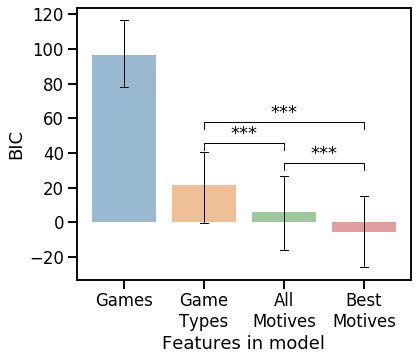

In [26]:
sns.set_context('talk')
fig,ax = plt.subplots(1,1,figsize = [6,5])
# bar_order = ['S,T pairs', 'Game Types', 'All Motives', 'Best Motives']
xticklabels = ['\n'.join(a.split(' ')) for a in bar_order]
sns.barplot(data = all_model_fits_cleaned, x = 'model_descr', y = 'BIC', ax = ax, alpha = .5,
            order = bar_order, errcolor = 'k', capsize = .1, errwidth = 1)
FigureTools.add_sig_markers(ax,relationships=[[2,3,0],[1,2,0],[1,3,0]], distScale = .5, ystart = 30)
ax.set(ylabel = 'BIC', xlabel = 'Features in model',
      xticklabels = xticklabels);

## Save best model per subject for use in eye tracking analysis

In [27]:
group_2.to_csv(base_dir + '/Data/Model_results/Best_motives_per_participant.csv',index=False)